In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("stock.csv")
ticker_list = df['Index'].unique()
df.index = df['Date']
df1 = df[df['Index']==ticker_list[0]]
df2 = df[df['Index']==ticker_list[1]]
df3 = df[df['Index']==ticker_list[2]]
df1 = df1[["Close"]]
df2 = df2[["Close"]]
df3 = df3[["Close"]]
df1.rename(columns={'Close':ticker_list[0]},inplace=True)
df2.rename(columns={'Close':ticker_list[1]},inplace=True)
df3.rename(columns={'Close':ticker_list[2]},inplace=True)
StockPrices = pd.concat([df1,df2,df3],axis='columns',names=['Date']).dropna()

In [3]:
StockReturns = StockPrices.pct_change().dropna()
print(StockReturns.head())

               IXIC      N225      NSEI
Date                                   
2012/1/5   0.008118 -0.008341  0.000063
2012/1/6   0.001633 -0.011587  0.000874
2012/1/10  0.010575  0.003803  0.020077
2012/1/11  0.003056  0.003042  0.002351
2012/1/12  0.005142 -0.007373 -0.006110


In [4]:
stock_return = StockReturns.copy()

In [5]:
# Calculate the daily rate of return and discard the missing value
StockReturns = StockPrices.pct_change().dropna()
print(StockReturns.head())

               IXIC      N225      NSEI
Date                                   
2012/1/5   0.008118 -0.008341  0.000063
2012/1/6   0.001633 -0.011587  0.000874
2012/1/10  0.010575  0.003803  0.020077
2012/1/11  0.003056  0.003042  0.002351
2012/1/12  0.005142 -0.007373 -0.006110


## Income calculation of portfolio

Given weight

               IXIC      N225      NSEI  Portfolio
Date                                              
2012/1/5   0.008118 -0.008341  0.000063  -0.005434
2012/1/6   0.001633 -0.011587  0.000874  -0.008396
2012/1/10  0.010575  0.003803  0.020077   0.006922
2012/1/11  0.003056  0.003042  0.002351   0.002940
2012/1/12  0.005142 -0.007373 -0.006110  -0.005932


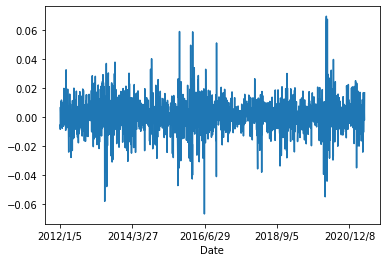

In [6]:
# Copy the yield data to the new variable stock_ Return, this is for the convenience of subsequent calls
stock_return = StockReturns.copy()

portfolio_weights = np.array([0.1,0.75,0.15])
#Calculate Weighted Stock Returns
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)
# Calculate the return of the portfolio
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

print(StockReturns.head())
 
StockReturns.Portfolio.plot()
plt.show()

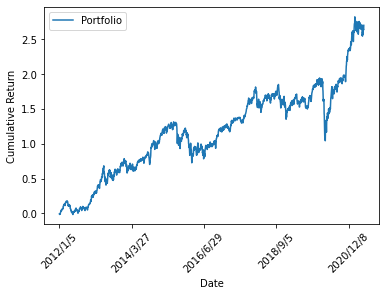

In [7]:
# Define the drawing function of cumulative income curve
def cumulative_returns_plot(name_list):
    for name in name_list:
        CumulativeReturns = ((1+StockReturns[name]).cumprod()-1)
        CumulativeReturns.plot(label=name)
    plt.legend()
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.show()

cumulative_returns_plot(['Portfolio'])

Average distribution weight

               IXIC      N225      NSEI  Portfolio  Portfolio_EW
Date                                                            
2012/1/5   0.008118 -0.008341  0.000063  -0.005434     -0.000053
2012/1/6   0.001633 -0.011587  0.000874  -0.008396     -0.003027
2012/1/10  0.010575  0.003803  0.020077   0.006922      0.011485
2012/1/11  0.003056  0.003042  0.002351   0.002940      0.002816
2012/1/12  0.005142 -0.007373 -0.006110  -0.005932     -0.002780


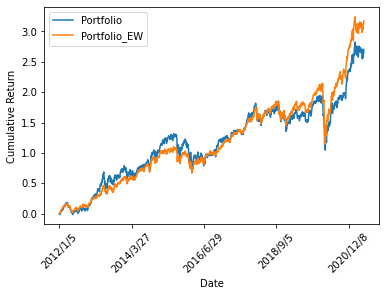

In [8]:
numstocks = 3
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
StockReturns['Portfolio_EW'] = stock_return.mul(portfolio_weights_ew, axis=1).sum(axis=1)
print(StockReturns.head())
cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

## Correlation analysis of portfolio

matrix

In [9]:
# StockReturns = StockPrices.pct_change().dropna()

# stock_return = StockReturns.copy()
correlation_matrix = stock_return.corr()

print(correlation_matrix)

          IXIC      N225      NSEI
IXIC  1.000000  0.198027  0.317244
N225  0.198027  1.000000  0.364220
NSEI  0.317244  0.364220  1.000000


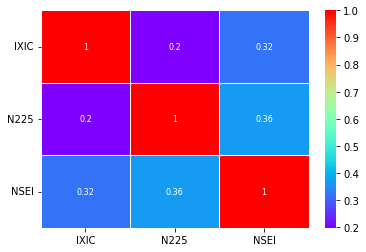

In [10]:
import seaborn as sns
#Create heat map
sns.heatmap(correlation_matrix,annot=True,cmap='rainbow',linewidths=1.0,annot_kws={'size':8})
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

covariance matrix

In [11]:
cov_mat = stock_return.cov()

cov_mat_annual = cov_mat * 252

print(cov_mat_annual)

          IXIC      N225      NSEI
IXIC  0.038814  0.008514  0.011016
N225  0.008514  0.047624  0.014009
NSEI  0.011016  0.014009  0.031065


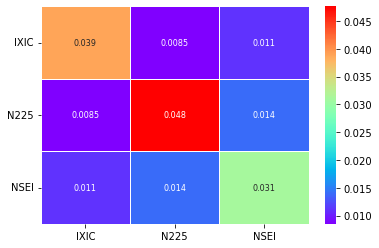

In [12]:
sns.heatmap(cov_mat_annual,annot=True,cmap='rainbow',linewidths=1.0,annot_kws={'size':8})
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

standard deviation

In [13]:
portfolio_weights = np.array([0.46,0.09,0.45])
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.14590941461921259


## Monte Carlo simulation of Markowitz model

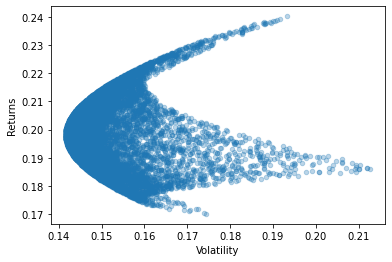

In [14]:
# Sets the number of simulations
number = 10000
# Set an empty numpy array to store the weight, yield and standard deviation obtained from each simulation
random_p = np.empty((number, 5))
# Set the seed of random number to make the result repeatable
np.random.seed(5)
 
for i in range(number):
   
    random5=np.random.random(3)
    random_weight=random5/np.sum(random5)
 
    #Calculate the average annual rate of return
    mean_return=stock_return.mul(random_weight,axis=1).sum(axis=1).mean()
    annual_return=(1+mean_return)**252-1
 
    #Calculate the annualized standard deviation, which is also called volatility
    random_volatility=np.sqrt(np.dot(random_weight.T,np.dot(cov_mat_annual,random_weight)))
 
    #Store the weight generated above, the calculated yield and standard deviation into the array random_ P medium
    random_p[i][:3]=random_weight
    random_p[i][3]=annual_return
    random_p[i][4]=random_volatility

RandomPortfolios=pd.DataFrame(random_p)

RandomPortfolios.columns=[ticker +'_weight' for ticker in ticker_list]+['Returns','Volatility']
 

RandomPortfolios.plot('Volatility','Returns',kind='scatter',alpha=0.3)
plt.show()

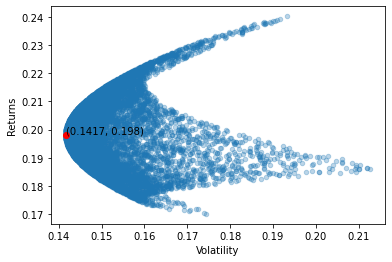

In [15]:
# Find the index value of the data with the smallest standard deviation
min_index = RandomPortfolios.Volatility.idxmin()
 
# Highlight the point with the lowest risk in the income risk scatter chart
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Returns']
plt.scatter(x, y, color='red')

plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.show()

In [36]:
# Extract the weight corresponding to the minimum fluctuation combination and convert it into numpy array
numstocks=3
MR_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])

StockReturns['Portfolio_MR'] = stock_return.mul(MR_weights, axis=1).sum(axis=1)

print(MR_weights)

[0.34599492 0.23494931 0.41905577]


## sharpe ratio

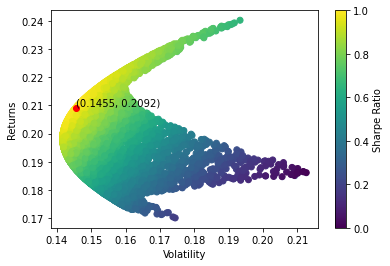

In [17]:
# Set the risk-free return rate to 0
risk_free = 0
# Calculate the sharp ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free) / RandomPortfolios.Volatility

max_index = RandomPortfolios.Sharpe.idxmax()

RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']

# Plot the scatter plot of income standard deviation and color the sharp ratio
plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Returns, c=RandomPortfolios.Sharpe)
plt.scatter(x, y, color='r')
plt.colorbar(label='Sharpe Ratio')
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.show()

In [18]:
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])

StockReturns['Portfolio_MSR'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)

print(MSR_weights)

[0.50319022 0.22285832 0.27395146]


In [19]:
import numpy as np

# setting the seed allows for reproducible results
np.random.seed(10)

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense
from tensorflow.keras.models import Sequential
import tensorflow.keras.backend as K

import pandas as pd

class Model:
    def __init__(self):
        self.data = None
        self.model = None
        
    def __build_model(self, input_shape, outputs):
        '''
        Builds and returns the Deep Neural Network that will compute the allocation ratios
        that optimize the Sharpe Ratio of the portfolio
        
        inputs: input_shape - tuple of the input shape, outputs - the number of assets
        returns: a Deep Neural Network model
        '''
        model = Sequential([
            LSTM(64, input_shape=input_shape),
            Flatten(),
            Dense(outputs, activation='softmax')
        ])

        def sharpe_loss(_, y_pred):
            # make all time-series start at 1
            data = tf.divide(self.data, self.data[0])  
            
            # value of the portfolio after allocations applied
            portfolio_values = tf.reduce_sum(tf.multiply(data, y_pred), axis=1) 
            
            portfolio_returns = (portfolio_values[1:] - portfolio_values[:-1]) / portfolio_values[:-1]  # % change formula

            sharpe = K.mean(portfolio_returns) / K.std(portfolio_returns)
            
            # since we want to maximize Sharpe, while gradient descent minimizes the loss, 
            #   we can negate Sharpe (the min of a negated function is its max)
            return -sharpe
        
        model.compile(loss=sharpe_loss, optimizer='adam')
        return model
    
    def get_allocations(self, data: pd.DataFrame):
        '''
        Computes and returns the allocation ratios that optimize the Sharpe over the given data
        
        input: data - DataFrame of historical closing prices of various assets
        
        return: the allocations ratios for each of the given assets
        '''
        
        # data with returns
        data_w_ret = np.concatenate([ data.values[1:], data.pct_change().values[1:] ], axis=1)
        
        data = data.iloc[1:]
        self.data = tf.cast(tf.constant(data), float)
        
        if self.model is None:
            self.model = self.__build_model(data_w_ret.shape, len(data.columns))
        
        fit_predict_data = data_w_ret[np.newaxis,:]        
        self.model.fit(fit_predict_data, np.zeros((1, len(data.columns))), epochs=40, shuffle=False)
        return self.model.predict(fit_predict_data)[0]

In [31]:
model = Model()
w = model.get_allocations(pd.DataFrame(StockPrices))
w

Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: -0.0689
Epoch 2/40
1/1 [==============================] - 0s 278ms/step - loss: -0.0706
Epoch 3/40
1/1 [==============================] - 0s 296ms/step - loss: -0.0708
Epoch 4/40
1/1 [==============================] - 0s 287ms/step - loss: -0.0710
Epoch 5/40
1/1 [==============================] - 0s 279ms/step - loss: -0.0712
Epoch 6/40
1/1 [==============================] - 0s 285ms/step - loss: -0.0714
Epoch 7/40
1/1 [==============================] - 0s 278ms/step - loss: -0.0717
Epoch 8/40
1/1 [==============================] - 0s 283ms/step - loss: -0.0719
Epoch 9/40
1/1 [==============================] - 0s 275ms/step - loss: -0.0721
Epoch 10/40
1/1 [==============================] - 0s 277ms/step - loss: -0.0723
Epoch 11/40
1/1 [==============================] - 0s 280ms/step - loss: -0.0725
Epoch 12/40
1/1 [==============================] - 0s 284ms/step - loss: -0.0727
Epoch 13/40
1/1 [=======================

array([0.4945516 , 0.33219865, 0.17324968], dtype=float32)

In [32]:
print("The weight of portfolio is:",w)

The weight of portfolio is: [0.4945516  0.33219865 0.17324968]


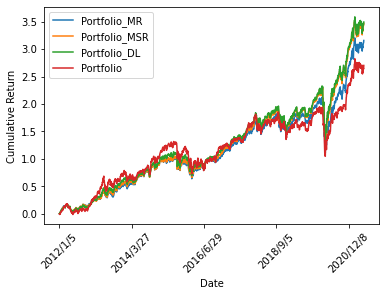

In [37]:
StockReturns['Portfolio_DL'] = stock_return.mul(w, axis=1).sum(axis=1)
cumulative_returns_plot(['Portfolio_MR','Portfolio_MSR','Portfolio_DL','Portfolio'])